In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

In [4]:
df_96 = pd.read_csv('data/1396.csv')
df_96.head()

,Timestamp,در کدام محدوده سنی هستید؟,جنسیت,خودتون رو متعلق به کدوم استان می دونین؟ بچه کجایین؟ (:,استان محل کار,چند سال تجربه کار تمام وقت دارید؟,آخرین وضعیت تحصیلی,چه مدارک بین المللی ای اخذ کرده اید,چند ساعت در هفته برای یادگیری تکنولوژی‌ها، زبان ها و ... جدید وقت می گذارید؟,بیشترین یادگیری شما در کجا اتفاق می افتد؟,چند ساعت در هفته برای پروژه‌های غیرکاری ولی مرتبط با حوزه کاری خود (برنامه نویسی، وبلاگنویسی، گزارش باگ، ...) وقت می گذارید؟,در سه ماه گذشته چند کتاب [غیردرسی] خوانده اید؟,زبان‌های برنامه‌نویسی مورد استفاده شما در پروژه‌ها کدامند؟,به جز زبان‌های فعلی‌تان، دوست دارید با چه زبان برنامه ای نویسی کار کنید؟,دیتابیس‌های مورد استفاده,سیستم عامل رومیزی شما کدام است؟,سیستم عامل سرور مورد علاقه شما,و وقتی صحبت از تلفن همراه باشد...,در چه محیطی برنامه نویسی می‌کنید,تم آی دی ای,از چه سورس کنترلی استفاده می کنید؟,از کدام تکنولوزی ها استفاده می کنید,کدام سرویس برای شما بسیار پر استفاده است؟,تب یا اسپیس؟,نوشیدنی‌های مورد علاقه شما چیست؟,تیپ,تغییر در بدن؟,کدام‌ها در مورد شما صدق می‌کند,سبک موسیقی,وضعیت رابطه,به طور معمول چند دیوایس دیجیتال با خودتان حمل می کنید (شامل لپ تاپ، پخش کننده موزیک، موبایل،‌ کتابخوان، ...),حوزه کاری شما چیست,نوع شرکت شما کدام است؟,تعداد مجموع کارمندان شرکت (در صورتی که انفرادی کار می کنید: 1),متوسط درآمد ماهیانه شما (به تومان),محل کار چه خدماتی بیشتر از حقوق ارائه می دهد,چگونه کار می کنید؟,شیوه کار شما کدام است؟,در صورتی که ساعتی کار می کنید، حقوق ساعتی شما چقدر است؟ (تومان),چقدر از کاری که انتخاب کرده اید راضی هستید؟,آیا برنامه نویسی یا مدیریت سیستم‌ها شغل اصلی شماست؟
0,2018/02/13 12:16:39 PM GMT+4:30,۳۰ تا ۳۹,مرد,تهران,تهران,پانزده تا بیست و پنج,لیسانس,"Management (PMP, SCRUM, ITIL, ...)",دو تا هفت ساعت,سایت‌های آموزش آنلاین خارجی;کتاب / خودآموزهای ...,کمتر از دو ساعت,سه تا شش,برنامه نویسی نمی‌کنم,Bash,No Database,OS X,Linux CentOS,"Android;iOS;Dumb phones (1100, ...)",سابلایم;اتم;ادیتورهای متن ساده (نوت پد پلاس پل...,تیره,گیت,سورس کنترل;ویکی‌های مربوط به پروژه,ترلو;تودولیست‌ها;اسلک;ابزارهای مدیریت پروژه ات...,تب,چای سیاه;قهوه;انواع ماء الشعیر;نوشیدنی‌های الکلی,تی شرت;جین;پیرهن مردونه;رسمی;گجت پوشیدنی دارم ...,NaN,بیشتر از یک نخ در روز سیگار می کشم;سیاست برایم...,کلاسیک;سنتی;پاپ ایرانی;دامبول;بلوز;کانتری,ازدواج کرده ام,4.0,مدیر شرکت / پروژه / ...,بخش آی تی شرکت های غیر نرم افزاری (مانند مخابر...,200.0,پنج تا هفت میلیون,باشگاه ورزشی داخل شرکت;قهوه،‌ چای و ... رایگان...,تمام وقت خصوصی (شامل استارتاپ‌های جا افتاده),تمام وقت‌های کاری را در دفتر هستم,ساعتی کار نمی کنم,4,خیر
1,2018/02/13 12:16:44 PM GMT+4:30,۲۳ تا ۲۹,مرد,کرمان,تهران,یک تا سه سال,فوق لیسانس,NaN,کمتر از دو ساعت,سایت‌های آموزش آنلاین خارجی;کتاب / خودآموزهای ...,دو تا هفت ساعت,دو یا سه,PHP;Javascript,Python;Javascript;Go;Haskell,MySQL/MariaDB,Linux Arch,Linux CentOS,iOS,سابلایم;ادیتورهای متن ساده (نوت پد پلاس پلاس، ...,تیره,گیت,سورس کنترل,استک اورفلو;ترلو;تسکولو;اسلک,اسپیس,چای سیاه;قهوه;انرژی زا;نوشابه;انواع ماء الشعیر...,تی شرت;جین;پیرهن مردونه;شال;تیره,NaN,بیشتر از یک نخ در روز سیگار می کشم;سیاست برایم...,سنتی;پاپ ایرانی;راک,رابطه های نا پایدار,2.0,توسعه دهنده بک اند,بخش دولتی;استارتاپ,14.0,دو تا سه و نیم میلیون,ناهار رایگان;قهوه،‌ چای و ... رایگان,نیمه وقت خصوصی (شامل استارتاپ‌های جا افتاده),اکثر مواقع دورکاری و گاهی به دفتر می روم,بین بیست و پنج تا پنجاه,4,بله
2,2018/02/13 12:19:42 PM GMT+4:30,۲۳ تا ۲۹,زن,همدان,تهران,زیر یکسال,لیسانس,NaN,کمتر از دو ساعت,ویدئوهای مستقل آموزشی;یادگیری از طریق انجام پروژه,صفر,دو یا سه,C#,Javascript,MS-SQL;Oracle,Windows 10,Windows Server 2016,Android,ویژوال استودیو,روشن,گیت;اس وی ان,سورس کنترل;کلاود,استک اورفلو;ترلو;ابزارهای مدیریت پروژه مایکروسافت,تب,چای سیاه;قهوه;دمنوش‌های متنوع;انرژی زا;نوشابه;...,جین;شال;رنگی رنگی;اسپورت,NaN,بیشتر از یک نخ در روز سیگار می کشم;حداقل یک رو...,کلاسیک;سنتی;پاپ ایرانی;بلوز,ازدواج کرده ام,1.0,توسعه دهنده بک اند,شرکت های تولید نرم افزار,100.0,یک تا دو میلیون,قهوه،‌ چای و ... رایگان;کارت هدیه و کارت خرید;...,تمام وقت خصوصی (شامل استارتاپ‌های جا افتاده),تمام وقت‌های کاری را در دفتر هستم,ساعتی کار نمی کنم,3,بله
3,2018/02/13 12:20:11 PM GMT+4:30,۲۳ تا ۲۹,مرد,تهران,تهران,سه تا هفت سال

In [6]:
df_96.columns

Index(['Timestamp', 'در کدام محدوده سنی هستید؟', 'جنسیت',
       'خودتون رو متعلق به کدوم استان می دونین؟ بچه کجایین؟ (:',
       'استان محل کار', 'چند سال تجربه کار تمام وقت دارید؟',
       'آخرین وضعیت تحصیلی', 'چه مدارک بین المللی ای اخذ کرده اید',
       'چند ساعت در هفته برای یادگیری تکنولوژی‌ها، زبان ها و ... جدید وقت می گذارید؟',
       'بیشترین یادگیری شما در کجا اتفاق می افتد؟',
       'چند ساعت در هفته برای پروژه‌های غیرکاری ولی مرتبط با حوزه کاری خود (برنامه نویسی، وبلاگنویسی، گزارش باگ، ...) وقت می گذارید؟',
       'در سه ماه گذشته چند کتاب [غیردرسی] خوانده اید؟',
       'زبان‌های برنامه‌نویسی مورد استفاده شما در پروژه‌ها کدامند؟',
       'به جز زبان‌های فعلی‌تان، دوست دارید با چه زبان برنامه ای نویسی کار کنید؟',
       'دیتابیس‌های مورد استفاده', 'سیستم عامل رومیزی شما کدام است؟',
       'سیستم عامل سرور مورد علاقه شما', 'و وقتی صحبت از تلفن همراه باشد...',
       'در چه محیطی برنامه نویسی می‌کنید', 'تم آی دی ای',
       'از چه سورس کنترلی استفاده می کنید؟',
       'از کدا

In [7]:
df_96.columns = ('time', 'age', 'gender', 'home_province', 'work_province', 'experience_years', 'education', 'international_certificates', 'learning_per_week', 'where_do_you_learn', 'fun_projects_per_week', 'books_read_last_three_months', 'programming_languages', 'want_to_work_languages', 'database', 'desktop_os', 'server_os', 'mobile_os', 'ide', 'ide_theme', 'source_control', 'technology', 'most_used_service', 'tab_or_space', 'drinks', 'style_', 'change_in_body', 'about_you', 'music_style', 'relationship', 'how_many_devices', 'position', 'company_type', 'employees', 'avg_monthly_salary', 'company_benefits', 'work_type', 'work_way', 'wage_per_hour', 'satisfaction', 'is_programming_your_main_job')

In [8]:
df_age = df_96.groupby(df_96.age, as_index=False).count()

In [16]:
from IPython.core.display import display, HTML

html_block = '''
<script src="https://code.highcharts.com/highcharts.js"></script>
<script src="https://code.highcharts.com/modules/exporting.js"></script>
<script src="https://code.highcharts.com/modules/export-data.js"></script>

<div id="container" style="min-width: 310px; height: 400px; max-width: 600px; margin: 0 auto"></div>

<script>
Highcharts.chart('container', {
    chart: {
        plotBackgroundColor: null,
        plotBorderWidth: null,
        plotShadow: false,
        type: 'pie'
    },
    title: {
        text: 'سن - ۱۳۹۶',
        useHTML: true,
        style: {
            fontSize: '20px',
            fontFamily: 'shabnam',
            direction: 'rtl',
        },
    },
    tooltip: {
        pointFormat: '{series.name}: <b>{point.percentage:.1f}%</b>',
        useHTML: true,
        style: {
            fontSize: '15px',
            fontFamily: 'shabnam',
            direction: 'rtl',
            textAlign: 'center'
        },
    },
    plotOptions: {
        pie: {
            allowPointSelect: true,
            cursor: 'pointer',
            dataLabels: {
                enabled: true,
                format: '\u202B' + '<b>{point.name}</b>: {point.percentage:.1f} %',
                useHTML: true,
                style: {
                    color: (Highcharts.theme && Highcharts.theme.contrastTextColor) || 'black',
                    textOutline: 0,
                    fontSize: '15px',
                    fontFamily: 'shabnam',
                    direction: 'rtl',
                    textAlign: 'center'
                }
            }
        }
    },
    series: [{
        name: 'Age',
        colorByPoint: true,
        data: '''

html2 = [] 

for i, item in enumerate(range(len(df_age.age.tolist()))):
    html2.append({
        'name': df_age.iloc[i].age,
        'y': df_age.iloc[i].gender
                 })


        
html3 = '''
    }]
});
</script>

'''

display(HTML(html_block + str(html2) + html3))

In [16]:
df_96.head()

,time,age,gender,home_province,work_province,experience_years,education,international_certificates,learning_per_week,where_do_you_learn,fun_projects_per_week,books_read_last_three_months,programming_languages,want_to_work_languages,database,desktop_os,server_os,mobile_os,ide,ide_theme,source_control,technology,most_used_service,tab_or_space,drinks,style_,change_in_body,about_you,music_style,relationship,how_many_devices,position,company_type,employees,avg_monthly_salary,company_benefits,work_type,work_way,wage_per_hour,satisfaction,is_programming_your_main_job
0,2018/02/13 12:16:39 PM GMT+4:30,۳۰ تا ۳۹,مرد,تهران,تهران,پانزده تا بیست و پنج,لیسانس,"Management (PMP, SCRUM, ITIL, ...)",دو تا هفت ساعت,سایت‌های آموزش آنلاین خارجی;کتاب / خودآموزهای ...,کمتر از دو ساعت,سه تا شش,برنامه نویسی نمی‌کنم,Bash,No Database,OS X,Linux CentOS,"Android;iOS;Dumb phones (1100, ...)",سابلایم;اتم;ادیتورهای متن ساده (نوت پد پلاس پل...,تیره,گیت,سورس کنترل;ویکی‌های مربوط به پروژه,ترلو;تودولیست‌ها;اسلک;ابزارهای مدیریت پروژه ات...,تب,چای سیاه;قهوه;انواع ماء الشعیر;نوشیدنی‌های الکلی,تی شرت;جین;پیرهن مردونه;رسمی;گجت پوشیدنی دارم ...,NaN,بیشتر از یک نخ در روز سیگار می کشم;سیاست برایم...,کلاسیک;سنتی;پاپ ایرانی;دامبول;بلوز;کانتری,ازدواج کرده ام,4.0,مدیر شرکت / پروژه / ...,بخش آی تی شرکت های غیر نرم افزاری (مانند مخابر...,200.0,پنج تا هفت میلیون,باشگاه ورزشی داخل شرکت;قهوه،‌ چای و ... رایگان...,تمام وقت خصوصی (شامل استارتاپ‌های جا افتاده),تمام وقت‌های کاری را در دفتر هستم,ساعتی کار نمی کنم,4,خیر
1,2018/02/13 12:16:44 PM GMT+4:30,۲۳ تا ۲۹,مرد,کرمان,تهران,یک تا سه سال,فوق لیسانس,NaN,کمتر از دو ساعت,سایت‌های آموزش آنلاین خارجی;کتاب / خودآموزهای ...,دو تا هفت ساعت,دو یا سه,PHP;Javascript,Python;Javascript;Go;Haskell,MySQL/MariaDB,Linux Arch,Linux CentOS,iOS,سابلایم;ادیتورهای متن ساده (نوت پد پلاس پلاس، ...,تیره,گیت,سورس کنترل,استک اورفلو;ترلو;تسکولو;اسلک,اسپیس,چای سیاه;قهوه;انرژی زا;نوشابه;انواع ماء الشعیر...,تی شرت;جین;پیرهن مردونه;شال;تیره,NaN,بیشتر از یک نخ در روز سیگار می کشم;سیاست برایم...,سنتی;پاپ ایرانی;راک,رابطه های نا پایدار,2.0,توسعه دهنده بک اند,بخش دولتی;استارتاپ,14.0,دو تا سه و نیم میلیون,ناهار رایگان;قهوه،‌ چای و ... رایگان,نیمه وقت خصوصی (شامل استارتاپ‌های جا افتاده),اکثر مواقع دورکاری و گاهی به دفتر می روم,بین بیست و پنج تا پنجاه,4,بله
2,2018/02/13 12:19:42 PM GMT+4:30,۲۳ تا ۲۹,زن,همدان,تهران,زیر یکسال,لیسانس,NaN,کمتر از دو ساعت,ویدئوهای مستقل آموزشی;یادگیری از طریق انجام پروژه,صفر,دو یا سه,C#,Javascript,MS-SQL;Oracle,Windows 10,Windows Server 2016,Android,ویژوال استودیو,روشن,گیت;اس وی ان,سورس کنترل;کلاود,استک اورفلو;ترلو;ابزارهای مدیریت پروژه مایکروسافت,تب,چای سیاه;قهوه;دمنوش‌های متنوع;انرژی زا;نوشابه;...,جین;شال;رنگی رنگی;اسپورت,NaN,بیشتر از یک نخ در روز سیگار می کشم;حداقل یک رو...,کلاسیک;سنتی;پاپ ایرانی;بلوز,ازدواج کرده ام,1.0,توسعه دهنده بک اند,شرکت های تولید نرم افزار,100.0,یک تا دو میلیون,قهوه،‌ چای و ... رایگان;کارت هدیه و کارت خرید;...,تمام وقت خصوصی (شامل استارتاپ‌های جا افتاده),تمام وقت‌های کاری را در دفتر هستم,ساعتی کار نمی کنم,3,بله
3,2018/02/13 12:20:11 PM GMT+4:30,۲۳ تا ۲۹,مرد,تهران,تهران,سه تا هفت سال,لیسانس,"Linux (LPIC, ...)",دو تا هفت ساعت,ویدئوهای مستقل آموزشی,کمتر از دو ساعت,دو یا سه,Bash,Python,MySQL/MariaDB,Linux Debian,Linux Debian,Android,mcedit,گاهی روشن گاهی تیره,گیت,سورس کنترل;کانتینرها;بیلد سیستم ها;تست های خود...,استک اورفلو;تودولیست‌ها;اسلک,تب,چای سیاه;دمنوش‌های متنوع;انرژی زا;نوشیدنی‌های ...,تی شرت;جین;گجت پوشیدنی دارم (ساعت هوشمند، ...),NaN,در رابطه نیستم ولی دوست داشتم بودم;حداقل یک رو...,پاپ خارجی;متال;easy listening;دامبول,با کامپیوتر/اینترنت/برنامه نویسی/سیستم عامل/.....,NaN,مدیر سیستم;مدیر دیتابیس,استارتاپ,20.0,دو تا سه و نیم میلیون,ناهار رایگان;قهوه،‌ چای و ... رایگان;برگزاری م...,تمام وقت خصوصی (شامل استارتاپ‌های جا افتاده),تمام وقت‌های کاری را در دفتر هستم,ساعتی کار نمی کنم,4,بله
4,2018/02/13 12:21:54 PM GMT+4:30,۲۳ تا ۲۹,مرد,یزد,یزد,یک تا سه سال,لیسانس,NaN,بیشتر از چهارده ساعت,یادگیری از طریق انجام پروژه,هفت تا چهارده ساعت,یک,PHP;Javascript;SQL,Python,MySQL/MariaDB;MongoDB;Redis,Linux Ubuntu,Linux Debian,And

In [17]:
df_96.fillna("هیچکدام", inplace=True)


df_96['programming_languages'] = df_96.programming_languages.apply(lambda x: x.split(';'))
df_96['want_to_work_languages'] = df_96.want_to_work_languages.apply(lambda x: x.split(';'))
df_96['database'] = df_96.database.apply(lambda x: x.split(';'))
df_96['desktop_os'] = df_96.desktop_os.apply(lambda x: x.split(';'))
df_96['server_os'] = df_96.server_os.apply(lambda x: x.split(';'))

df_96['mobile_os'] = df_96.mobile_os.str.replace("Dump phones \(1100, ...\)", "Dump phones")
df_96['mobile_os'] = df_96.mobile_os.apply(lambda x: x.split(';'))

df_96['ide'] = df_96.ide.apply(lambda x: x.split(';'))
df_96['source_control'] = df_96.source_control.apply(lambda x: x.split(';'))
df_96['technology'] = df_96.technology.apply(lambda x: x.split(';'))
df_96['drinks'] = df_96.drinks.apply(lambda x: x.split(';'))
df_96['style'] = df_96.style.apply(lambda x: x.split(';'))
df_96['change_in_body'] = df_96.change_in_body.apply(lambda x: x.split(';'))
df_96['music_style'] = df_96.music_style.apply(lambda x: x.split(';'))
df_96['position'] = df_96.position.apply(lambda x: x.split(';'))
df_96['company_type'] = df_96.company_type.apply(lambda x: x.split(';'))
df_96['company_benefits'] = df_96.company_benefits.apply(lambda x: x.split(';'))
df_96['style_'] = df_96.style_.apply(lambda x: x.split(';'))
df_96['where_do_you_learn'] = df_96.where_do_you_learn.apply(lambda x: x.split(';'))
df_96['most_used_service'] = df_96.most_used_service.apply(lambda x: x.split(';'))
df_96['about_you'] = df_96.about_you.apply(lambda x: x.split(';'))

df_96.head()

,time,age,gender,home_province,work_province,experience_years,education,international_certificates,learning_per_week,where_do_you_learn,fun_projects_per_week,books_read_last_three_months,programming_languages,want_to_work_languages,database,desktop_os,server_os,mobile_os,ide,ide_theme,source_control,technology,most_used_service,tab_or_space,drinks,style_,change_in_body,about_you,music_style,relationship,how_many_devices,position,company_type,employees,avg_monthly_salary,company_benefits,work_type,work_way,wage_per_hour,satisfaction,is_programming_your_main_job,style
0,2018/02/13 12:16:39 PM GMT+4:30,۳۰ تا ۳۹,مرد,تهران,تهران,پانزده تا بیست و پنج,لیسانس,"Management (PMP, SCRUM, ITIL, ...)",دو تا هفت ساعت,"[سایت‌های آموزش آنلاین خارجی, کتاب / خودآموزها...",کمتر از دو ساعت,سه تا شش,[برنامه نویسی نمی‌کنم],[Bash],[No Database],[OS X],[Linux CentOS],"[Android, iOS, Dumb phones (1100, ...)]","[سابلایم, اتم, ادیتورهای متن ساده (نوت پد پلاس...",تیره,[گیت],"[سورس کنترل, ویکی‌های مربوط به پروژه]","[ترلو, تودولیست‌ها, اسلک, ابزارهای مدیریت پروژ...",تب,"[چای سیاه, قهوه, انواع ماء الشعیر, نوشیدنی‌های...","[تی شرت, جین, پیرهن مردونه, رسمی, گجت پوشیدنی ...",[هیچکدام],"[بیشتر از یک نخ در روز سیگار می کشم, سیاست برا...","[کلاسیک, سنتی, پاپ ایرانی, دامبول, بلوز, کانتری]",ازدواج کرده ام,4,[مدیر شرکت / پروژه / ...],[بخش آی تی شرکت های غیر نرم افزاری (مانند مخاب...,200.0,پنج تا هفت میلیون,"[باشگاه ورزشی داخل شرکت, قهوه،‌ چای و ... رایگ...",تمام وقت خصوصی (شامل استارتاپ‌های جا افتاده),تمام وقت‌های کاری را در دفتر هستم,ساعتی کار نمی کنم,4,خیر,<pandas.io.formats.style.Styler object at 0x7f...
1,2018/02/13 12:16:44 PM GMT+4:30,۲۳ تا ۲۹,مرد,کرمان,تهران,یک تا سه سال,فوق لیسانس,هیچکدام,کمتر از دو ساعت,"[سایت‌های آموزش آنلاین خارجی, کتاب / خودآموزها...",دو تا هفت ساعت,دو یا سه,"[PHP, Javascript]","[Python, Javascript, Go, Haskell]",[MySQL/MariaDB],[Linux Arch],[Linux CentOS],[iOS],"[سابلایم, ادیتورهای متن ساده (نوت پد پلاس پلاس...",تیره,[گیت],[سورس کنترل],"[استک اورفلو, ترلو, تسکولو, اسلک]",اسپیس,"[چای سیاه, قهوه, انرژی زا, نوشابه, انواع ماء ا...","[تی شرت, جین, پیرهن مردونه, شال, تیره]",[هیچکدام],"[بیشتر از یک نخ در روز سیگار می کشم, سیاست برا...","[سنتی, پاپ ایرانی, راک]",رابطه های نا پایدار,2,[توسعه دهنده بک اند],"[بخش دولتی, استارتاپ]",14.0,دو تا سه و نیم میلیون,"[ناهار رایگان, قهوه،‌ چای و ... رایگان]",نیمه وقت خصوصی (شامل استارتاپ‌های جا افتاده),اکثر مواقع دورکاری و گاهی به دفتر می روم,بین بیست و پنج تا پنجاه,4,بله,<pandas.io.formats.style.Styler object at 0x7f...
2,2018/02/13 12:19:42 PM GMT+4:30,۲۳ تا ۲۹,زن,همدان,تهران,زیر یکسال,لیسانس,هیچکدام,کمتر از دو ساعت,"[ویدئوهای مستقل آموزشی, یادگیری از طریق انجام ...",صفر,دو یا سه,[C#],[Javascript],"[MS-SQL, Oracle]",[Windows 10],[Windows Server 2016],[Android],[ویژوال استودیو],روشن,"[گیت, اس وی ان]","[سورس کنترل, کلاود]","[استک اورفلو, ترلو, ابزارهای مدیریت پروژه مایک...",تب,"[چای سیاه, قهوه, دمنوش‌های متنوع, انرژی زا, نو...","[جین, شال, رنگی رنگی, اسپورت]",[هیچکدام],"[بیشتر از یک نخ در روز سیگار می کشم, حداقل یک ...","[کلاسیک, سنتی, پاپ ایرانی, بلوز]",ازدواج کرده ام,1,[توسعه دهنده بک اند],[شرکت های تولید نرم افزار],100.0,یک تا دو میلیون,"[قهوه،‌ چای و ... رایگان, کارت هدیه و کارت خری...",تمام وقت خصوصی (شامل استارتاپ‌های جا افتاده),تمام وقت‌های کاری را در دفتر هستم,ساعتی کار نمی کنم,3,بله,<pandas.io.formats.style.Styler object at 0x7f...
3,2018/02/13 12:20:11 PM GMT+4:30,۲۳ تا ۲۹,مرد,تهران,تهران,سه تا هفت سال,لیسانس,"Linux (LPIC, ...)",دو تا هفت ساعت,[ویدئوهای مستقل آموزشی],کمتر از دو ساعت,دو یا سه,[Bash],[Python],[MySQL/MariaDB],[Linux Debian],[Linux Debian],[Android],[mcedit],گاهی روشن گاهی تیره,[گیت],"[سورس کنترل, کانتینرها, بیلد سیستم ها, تست های...","[استک اورفلو, تودولیست‌ها, اسلک]",تب,"[چای سیاه, دمنوش‌های متنوع, انرژی زا, نوشیدنی‌...","[تی شرت, جین, گجت پوشیدنی دارم (ساعت هوشمند، ....",[هیچکدام],"[در رابطه نیستم ولی دوست داشتم بودم, حداقل یک ...","[پاپ خارجی, متال, easy listening, دامبول]",با کامپیوتر/اینترنت/برنامه نویسی/سیستم عامل/.....,هیچکدام,"[مدیر سیستم, مدیر دیتابیس]",[استارتاپ],20.0,دو تا 

In [18]:
df_96.source_control[2]

['گیت', 'اس وی ان']

In [77]:
df_age = df_96.groupby(df_96.age, as_index=False).count()

(-1.25, 1.25, -1.25, 1.25)

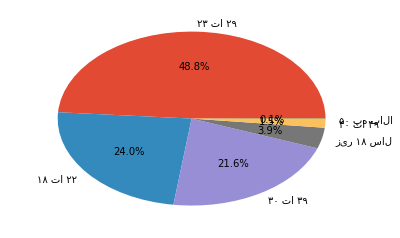

In [49]:
df_96.age.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('off')